In [1]:
from duckduckgo_search import DDGS
from fastcore.all import *
from fastdownload import download_url
from fastai.vision.all import *
import time, json

def search_images(keywords, max_images=200): return L(DDGS().images(keywords, max_results=max_images)).itemgot('image')
download_url(search_images('ocean photos', max_images=1)[0], 'ocean.jpg', show_progress=False)

Path('ocean.jpg')

In [2]:
searches = 'ocean', 'anomaly'
path = Path('ocean_400')
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls=search_images(f'{o} photo'))
    time.sleep(5)
    resize_images(path/o, max_size=300, dest=path/o)
failed = verify_images(get_image_files(path))
failed.map(Path.unlink)
len(failed)

9

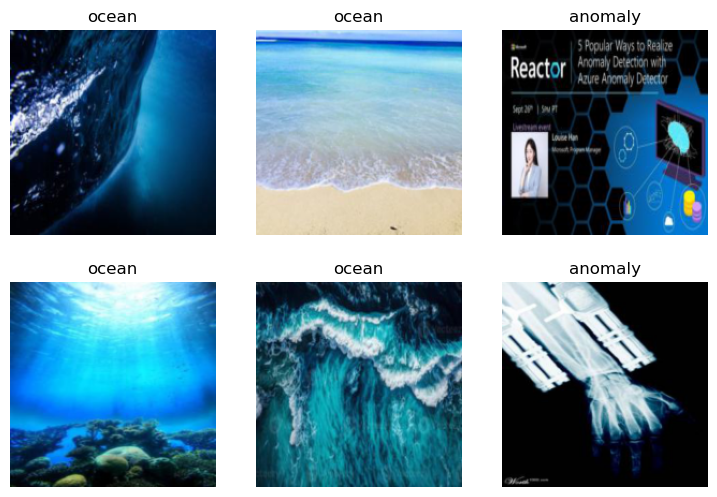

In [3]:
dls = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=[Resize(192, method='squish')]
).dataloaders(path, bs=32)

dls.show_batch(max_n=6)

In [4]:
learn = vision_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(9)

epoch,train_loss,valid_loss,error_rate,time
0,0.856364,0.110192,0.040462,00:07


epoch,train_loss,valid_loss,error_rate,time
0,0.328827,0.086171,0.023121,00:08
1,0.251477,0.066157,0.023121,00:08
2,0.171790,0.053799,0.017341,00:08
3,0.122432,0.030797,0.011561,00:08
4,0.093572,0.034023,0.011561,00:08
5,0.063725,0.033536,0.011561,00:08
6,0.042426,0.025230,0.017341,00:08
7,0.035232,0.023686,0.011561,00:08
8,0.025363,0.027824,0.011561,00:08


In [8]:
what_is,_,probs = learn.predict(PILImage.create('ocean.jpg'))
print(f"This is a: {what_is}.")
print(f"Probability it's a {what_is}: {probs[0]:.4f}")

This is a: ocean.
Probability it's a ocean: 0.0001
